## Acceso a Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 21.0 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode

## Funciones

In [ ]:
def clean_text(text):
    # Expresión regular para encontrar todas las cadenas que empiezan con "https://t.co/" y tienen uno o más caracteres que no son espacios en blanco.
    pattern = r'https://t.co/[^\s]+|@[a-zA-Z0-9_]{1,15}|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+|[^\w\s]'
    
    # Reemplaza todas las cadenas que coinciden con la expresión regular por una cadena vacía.
    clean_text = re.sub(pattern, '', text)
    
    # Convertir todas las letras a minúsculas
    clean_text = clean_text.lower()

    return clean_text

## Leyendo datos

In [ ]:
text_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs/train_data.csv", names=['image', 'text'],header=None) 
labels_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs/train_labels_subtask_2.csv", names=['accidente', 'asesinato', 'robo', 'otro'],header=None)

d = {'image':text_df['image'].values, 'text':text_df['text'].values, 'accidente':labels_df['accidente'].values, 'asesinato':labels_df['asesinato'].values, 'robo':labels_df['robo'].values, 'otro':labels_df['otro'].values}
df = pd.DataFrame(data = d)

pd.set_option('display.max_colwidth',None)
df.head(5)

,image,text,accidente,asesinato,robo,otro
0,['E_f1Fl-XMAMPFkT.jpg'],Morales: #EEUU “sufrió una derrota vergonzosa” ante el terrorismo y el narcotráfico #NarcoterrorismoDoméstico https://t.co/GCenoztH3H https://t.co/WMF36c68i3,0,0,0,1
1,['E8NYFP5WYAEpNRb.jpg'],"Tus acciones te hacen ser una bella persona, no tu color de piel o tu dinero, esa joven con su hermoso gesto me robo el corazon. https://t.co/wXfw2Hrqv7",0,0,0,1
2,['E_BP33UXoAYQcTI.png'],"#Seguridad 🚨🛑 Detuvo policía municipal a dos hombres por robo a casa habitación, en #Puebla. En la acción se recuperaron computadoras portátiles, un equipo de audio, un dispositivo de comunicación móvil, entre otros artículos. Urbano| Noticias https://t.co/xXKSnVjz8k... https://t.co/HcoPbEpPLk",0,0,1,0
3,['E_XFlhCXIAAl-GR.jpg'],20 años del accidente que convirtió a Alex Zanardi en leyenda. https://t.co/TALvr20hB5,0,0,0,1
4,"['E_Gc6blX0AEnhW5.jpg', 'E_Gc3IzWQA046Zf.jpg']","¡Llega el castigo para Max Verstappen! El neerlandés tendrá tres posiciones de sanción en la parrilla de salida del #RussianGP, tras el accidente que protagonizó con Lewis Hamilton en el #ItalianGP ¿Qué opinan de la decisión de la FIA? | #F1 https://t.co/yfUlLPzcGL",0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      2996 non-null   object
 1   text       2996 non-null   object
 2   accidente  2996 non-null   int64 
 3   asesinato  2996 non-null   int64 
 4   robo       2996 non-null   int64 
 5   otro       2996 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 140.6+ KB


In [ ]:
df.isnull().sum()

image        0
text         0
accidente    0
asesinato    0
robo         0
otro         0
dtype: int64

## Limpieza de datos

In [ ]:
df_Preprocessing = df.copy()

In [ ]:
df_Preprocessing.drop('image', axis=1, inplace=True)

In [ ]:
# Aplica la función a la columna "text" del DataFrame "df".
df_Preprocessing['text'] = df_Preprocessing['text'].apply(clean_text)

In [ ]:
df_Preprocessing['accidente'] = df_Preprocessing['accidente'].astype(float)
df_Preprocessing['asesinato'] = df_Preprocessing['asesinato'].astype(float)
df_Preprocessing['robo'] = df_Preprocessing['robo'].astype(float)
df_Preprocessing['otro'] = df_Preprocessing['otro'].astype(float)

In [ ]:
df_Preprocessing

,text,accidente,asesinato,robo,otro
0,morales eeuu sufrió una derrota vergonzosa ante el terrorismo y el narcotráfico narcoterrorismodoméstico,0.0,0.0,0.0,1.0
1,tus acciones te hacen ser una bella persona no tu color de piel o tu dinero esa joven con su hermoso gesto me robo el corazon,0.0,0.0,0.0,1.0
2,seguridad detuvo policía municipal a dos hombres por robo a casa habitación en puebla en la acción se recuperaron computadoras portátiles un equipo de audio un dispositivo de comunicación móvil entre otros artículos urbano noticias,0.0,0.0,1.0,0.0
3,20 años del accidente que convirtió a alex zanardi en leyenda,0.0,0.0,0.0,1.0
4,llega el castigo para max verstappen el neerlandés tendrá tres posiciones de sanción en la parrilla de salida del russiangp tras el accidente que protagonizó con lewis hamilton en el italiangp qué opinan de la decisión de la fia f1,0.0,0.0,0.0,1.0
...,...,...,...,...,...
2991,estan en su derecho de ser escuchados y conciliar por el accidente pero desde el momento que estan en carreras ilegales a mi parecer saben que estan expuestos a todo accidentes de todo tipo para eso existen lugares para ese tipo de competicion,0.0,0.0,0.0,1.0
2992,15 av y 5a calle zona 1 se produjo accidente de tres vehículos bomberos voluntarios 4a cía evaluaron a las personas resultaron ilesas,1.0,0.0,0.0,0.0
2993,detienen a 2 policías sudafricanos por asesinato de un joven con síndrome de down nathaniel julius adolescente de 16 años con síndrome de down fue asesinado el miércoles en eldorado park el joven había salido a comprar galletas a un vía eluniversal,0.0,1.0,0.0,0.0
2994,camionetaenllamas una camioneta se incendió en la colonia tabachines en el municipio de zapopan después de un accidente 𝙍𝙚𝙥𝙤𝙧𝙩𝙚𝘾𝙞𝙪𝙙𝙖𝙙𝙖𝙣𝙤𝙉𝙤𝙩𝙞𝙘𝙞𝙖𝙨,1.0,0.0,0.0,0.0


## Análisis exploratorio de datos

### Distribución de etiquetas

#### Conteo de tuits por categoria

accidente

In [ ]:
# Filtrar los tuits que pertenecen a la categoría "accidente"
accidente_tweets = df_Preprocessing[df['accidente'] == 1]['text']

# Contar los tuits que pertenecen a la categoría "accidente"
count_accidentes = df_Preprocessing['accidente'].sum()
count_ones = df_Preprocessing['accidente'].value_counts()[1]
count_accidente_tweets = sum(df['accidente'] == 1)

# Imprimir los tuits que pertenecen a la categoría "accidente"
print(accidente_tweets)

# Imprimir el numero de tuits que pertenecen a la categoría "accidente" respectivamente
print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

5                                                                                                              accidente  se  en el paso a desnivel al final de la 20 calle de la zona 10 ingreso a santa catarina pinula persona fallecida  
6                  endesarrollo  un camión que transportaba jugadores se precipitó a un barranco de 7 metros de profundidad el accidente ocurrió en la carretera litoral a la altura del cantón cipres en conchagua la unión según reporta   
10                                                                                 precauciónvial en zacatecas se registra accidente vial cerca del km 027500 carretera 2870 libramiento víctor rosales mismo tramo atienda indicación vial  
11                                                                                                                           accidente en bogotámosquera  rn5008a gtoriente traficobogota tráfico avanzando1h 7m más lento de lo habitual    
15                                              

asesinato

In [ ]:
accidente_tweets = df_Preprocessing[df['asesinato'] == 1]['text']

count_accidentes = df_Preprocessing['asesinato'].sum()
count_ones = df_Preprocessing['asesinato'].value_counts()[1]
count_accidente_tweets = sum(df['asesinato'] == 1)

print(accidente_tweets)

print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

17                                                                                                                                                                                             videos  ola de violencia en oaxaca asesinan a magistrado a una familia y a tres mujeres    
22                                                        últimahora autoridades reportan asesinato en la colonia médica de un joven identificado como edgar alvarenga de 19 años según la primeras declaraciones fue asaltado en un autobús r22 al encarar al asaltante éste le disparó  
33                                                                                                                                                                                                                          noche de violencia en ixmiquilpan  ejecutan a dos hombres     
52              comunicadodeprensa este comando rechaza categóricamente el vil asesinato del subteniete carlos arturo becerra castellanos por integrant

robo

In [ ]:
accidente_tweets = df_Preprocessing[df['robo'] == 1]['text']

count_accidentes = df_Preprocessing['robo'].sum()
count_ones = df_Preprocessing['robo'].value_counts()[1]
count_accidente_tweets = sum(df['robo'] == 1)

print(accidente_tweets)

print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

2       seguridad  detuvo policía municipal a dos hombres por robo a casa habitación en puebla en la acción se recuperaron computadoras portátiles un equipo de audio un dispositivo de comunicación móvil entre otros artículos urbano noticias    
7                                                                             sujeto de la izq aprehendido hace 2 semanas por robo a cable de   y ayer nuevamente robando que pasa con el mp    no hay alumbrado público en 3era secc tlatelolco    
22                  últimahora autoridades reportan asesinato en la colonia médica de un joven identificado como edgar alvarenga de 19 años según la primeras declaraciones fue asaltado en un autobús r22 al encarar al asaltante éste le disparó  
26                                                     tres vendedores de abarrotes fueron lesionados con armas de fuego tras un intento de asalto sobre la calle luis long norte esquina con ejercito nacional de la colonia san martin de porres  
50                  

otro

In [ ]:
accidente_tweets = df_Preprocessing[df['otro'] == 1]['text']

count_accidentes = df_Preprocessing['otro'].sum()
count_ones = df_Preprocessing['otro'].value_counts()[1]
count_accidente_tweets = sum(df['otro'] == 1)

print(accidente_tweets)

print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

0                                                                                                                                                                morales eeuu sufrió una derrota vergonzosa ante el terrorismo y el narcotráfico narcoterrorismodoméstico     
1                                                                                                                                              tus acciones te hacen ser una bella persona no tu color de piel o tu dinero esa joven con su hermoso gesto me robo el corazon  
3                                                                                                                                                                                                              20 años del accidente que convirtió a alex zanardi en leyenda  
4                                llega el castigo para max verstappen  el neerlandés tendrá tres posiciones de sanción en la parrilla de salida del russiangp tras el accidente que protago

#### Graficando distribución de las etiquetas

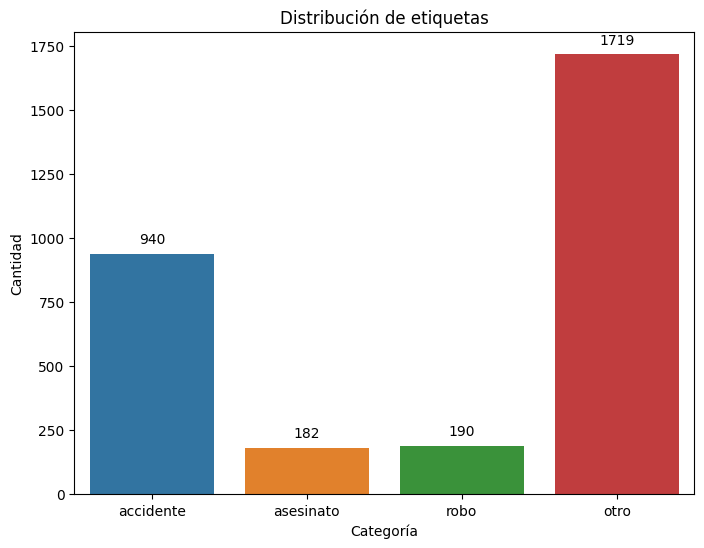

In [ ]:
# Suponiendo que tu DataFrame se llama df

# Obtener la suma de las etiquetas para cada categoría
labels_sum = df_Preprocessing[['accidente', 'asesinato', 'robo', 'otro']].sum()

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))

# Graficar la distribución de etiquetas
ax = sns.barplot(x=labels_sum.index, y=labels_sum.values)

# Agregar etiquetas en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Establecer el título y etiquetas de los ejes
plt.title('Distribución de etiquetas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

#### Balanceo en el parametro del algoritmo de ML

In [ ]:
df_Balanced = df_Preprocessing.copy()

## Divide el dataset

In [ ]:
from sklearn.model_selection import train_test_split

xFeatures = df_Balanced['text']
yLabels = df_Balanced[['accidente', 'asesinato', 'robo', 'otro']]

x_train, x_test, y_train, y_test = train_test_split(xFeatures, yLabels, test_size=0.1, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df_Balanced["text"], df_Balanced[["accidente", "asesinato", "robo", "otro"]], test_size=0.1, random_state=42)
#train, test = train_test_split(df_Balanced, test_size=0.1, stratify=df_Balanced["labels"], random_state=42)
# train, test = train_test_split(df_Balanced, test_size=0.0004, stratify=df_Balanced["labels"], random_state=42)
len(x_train), len(x_test)

(2696, 300)

In [ ]:
df_Balanced_train = x_train.copy()
target_train = y_train.copy()

df_Balanced_test = x_test.copy()
target_test = y_test.copy()

## Feature engineering

In [ ]:
example_sentence = df_Balanced.iloc[431]["text"]
print(example_sentence)

  no murió  ya vez que algunos compañeros inventan o exagerados  tuvo un accidente solamente y pero esta vivita y dando lata   


In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tk_tokenizer = ToktokTokenizer()

tokens = tk_tokenizer.tokenize(example_sentence)
print(" # ".join(tokens))

no # murió # ya # vez # que # algunos # compañeros # inventan # o # exagerados # tuvo # un # accidente # solamente # y # pero # esta # vivita # y # dando # lata


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sp_stopwords = stopwords.words("spanish")
sp_punctuation = string.punctuation + '¿¡'

not_wanted = set((unidecode(word) for word in sp_stopwords)) | set(sp_punctuation)
  
tk_tokenizer = ToktokTokenizer()


def tokenize(sentence):
    clean = []
    clean_sentence = unidecode(sentence)
    for token_ in tk_tokenizer.tokenize(clean_sentence):
        token = token_.lower()
        if token in not_wanted:
            continue
        clean.append(token)
    return clean

In [ ]:
tokens = tokenize(example_sentence)
print(example_sentence)
print()
tokens = tokenize(example_sentence)
print(" # ".join(tokens))

  no murió  ya vez que algunos compañeros inventan o exagerados  tuvo un accidente solamente y pero esta vivita y dando lata   

murio # vez # companeros # inventan # exagerados # accidente # solamente # vivita # dando # lata


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize)
# vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize, max_features=1000)
# vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize, min_df=0.01 )

In [ ]:
vectorizador_real.fit(df_Balanced_train)

train_x = vectorizador_real.transform(df_Balanced_train)
test_x = vectorizador_real.transform(df_Balanced_test)

## Implementación de modelo

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier

In [ ]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 7.1 MB/s eta 0:00:00


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
#from sklearn.multioutput import MultiOutputClassifier

### Multinomial NaiveBayes

In [ ]:
# Crear el clasificador base Naive Bayes
naive_bayes = MultinomialNB(alpha=0.1, fit_prior=True)

# Crear el clasificador Bagging utilizando el clasificador base Naive Bayes
# Entrenar el clasificador Bagging con los datos de entrenamiento
bagging_classifier = BaggingClassifier(base_estimator=naive_bayes, n_estimators=50, random_state=2022)#.fit(train_x, target_train)

# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(bagging_classifier)

binary_rel_clf.fit(train_x,target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BinaryRelevance(classifier=BaggingClassifier(base_estimator=MultinomialNB(alpha=0.1),
                                             n_estimators=50,
                                             random_state=2022),
                require_dense=[True, True])

In [ ]:
train_pred = binary_rel_clf.predict(train_x)  # Para diagnosticar overfitting
test_pred = binary_rel_clf.predict(test_x)  # Para decidir cambios sobre el modelo

## Revisando las métricas establecidas para el conjunto de test

In [ ]:
training_accuracy = accuracy_score(target_train, train_pred)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision_macro = precision_score(target_test, test_pred, average='macro')
test_recall_macro = recall_score(target_test, test_pred, average='macro')
test_f1_macro = f1_score(target_test, test_pred, average='macro')
#test_matrix = confusion_matrix(target_test, test_pred)

print(f"Training accuracy:   {training_accuracy:0.2%}")

print(f"Test accuracy: {test_accuracy:0.2%}")
print(f"Test precision: {test_precision_macro}")
print(f"Test recall: {test_recall_macro}")
print(f"Test f1-score: {test_f1_macro}")
#print(f"Test Matrix: {test_matrix}")

Training accuracy:   96.55%
Test accuracy: 85.33%
Test precision: 0.759351807021151
Test recall: 0.7326316756424741
Test f1-score: 0.7435089896545676


### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear el clasificador Bagging utilizando el clasificador base Naive Bayes
# Entrenar el clasificador Bagging con los datos de entrenamiento

# bagging_classifier = BaggingClassifier(base_estimator=rf_model, n_estimators=50, random_state=2022)#.fit(train_x, target_train)

# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(rf_model)

binary_rel_clf.fit(train_x,target_train)

train_pred = binary_rel_clf.predict(train_x)  # Para diagnosticar overfitting
test_pred = binary_rel_clf.predict(test_x)

training_accuracy = accuracy_score(target_train, train_pred)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision_macro = precision_score(target_test, test_pred, average='macro')
test_recall_macro = recall_score(target_test, test_pred, average='macro')
test_f1_macro = f1_score(target_test, test_pred, average='macro')
#test_matrix = confusion_matrix(target_test, test_pred)

print(f"Training accuracy:   {training_accuracy:0.2%}")

print(f"Test accuracy: {test_accuracy:0.2%}")
print(f"Test precision: {test_precision_macro}")
print(f"Test recall: {test_recall_macro}")
print(f"Test f1-score: {test_f1_macro}")
#print(f"Test Matrix: {test_matrix}")

Training accuracy:   100.00%
Test accuracy: 83.33%
Test precision: 0.6903651903651904
Test recall: 0.49069084467648705
Test f1-score: 0.49743509156962806


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Crear el clasificador Bagging utilizando el clasificador base Naive Bayes
# Entrenar el clasificador Bagging con los datos de entrenamiento

#bagging_classifier = BaggingClassifier(base_estimator=rf_model, n_estimators=50, random_state=2022)#.fit(train_x, target_train)

# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(rf_model)

binary_rel_clf.fit(train_x,target_train)

train_pred = binary_rel_clf.predict(train_x)  # Para diagnosticar overfitting
test_pred = binary_rel_clf.predict(test_x)

training_accuracy = accuracy_score(target_train, train_pred)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision_macro = precision_score(target_test, test_pred, average='macro')
test_recall_macro = recall_score(target_test, test_pred, average='macro')
test_f1_macro = f1_score(target_test, test_pred, average='macro')
#test_matrix = confusion_matrix(target_test, test_pred)

print(f"Training accuracy:   {training_accuracy:0.2%}")

print(f"Test accuracy: {test_accuracy:0.2%}")
print(f"Test precision: {test_precision_macro}")
print(f"Test recall: {test_recall_macro}")
print(f"Test f1-score: {test_f1_macro}")
#print(f"Test Matrix: {test_matrix}")

Training accuracy:   100.00%
Test accuracy: 83.33%
Test precision: 0.6967677345537757
Test recall: 0.49048884330909315
Test f1-score: 0.5010795919886829


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(kernel="linear", C=50, class_weight="balanced")

# bagging_classifier = BaggingClassifier(base_estimator=svm_classifier, n_estimators=50, random_state=2022)#.fit(train_x, target_train)

binary_rel_clf = BinaryRelevance(svm_classifier)

binary_rel_clf.fit(train_x,target_train)

train_pred = binary_rel_clf.predict(train_x)  # Para diagnosticar overfitting
test_pred = binary_rel_clf.predict(test_x)

training_accuracy = accuracy_score(target_train, train_pred)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision_macro = precision_score(target_test, test_pred, average='macro')
test_recall_macro = recall_score(target_test, test_pred, average='macro')
test_f1_macro = f1_score(target_test, test_pred, average='macro')

print(f"Training accuracy:   {training_accuracy:0.2%}")

print(f"Test accuracy: {test_accuracy:0.2%}")
print(f"Test precision: {test_precision_macro}")
print(f"Test recall: {test_recall_macro}")
print(f"Test f1-score: {test_f1_macro}")

Training accuracy:   100.00%
Test accuracy: 81.33%
Test precision: 0.8239733126052597
Test recall: 0.7215971452910831
Test f1-score: 0.7647266493859326


In [ ]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=20, class_weight="balanced")

# bagging_classifier = BaggingClassifier(base_estimator=svm_clf, n_estimators=50, random_state=2022)#.fit(train_x, target_train)

binary_rel_clf = BinaryRelevance(svm_clf)

binary_rel_clf.fit(train_x,target_train)

train_pred = binary_rel_clf.predict(train_x)  # Para diagnosticar overfitting
test_pred = binary_rel_clf.predict(test_x)

training_accuracy = accuracy_score(target_train, train_pred)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision_macro = precision_score(target_test, test_pred, average='macro')
test_recall_macro = recall_score(target_test, test_pred, average='macro')
test_f1_macro = f1_score(target_test, test_pred, average='macro')

print(f"Training accuracy:   {training_accuracy:0.2%}")

print(f"Test accuracy: {test_accuracy:0.2%}")
print(f"Test precision: {test_precision_macro}")
print(f"Test recall: {test_recall_macro}")
print(f"Test f1-score: {test_f1_macro}")

Training accuracy:   100.00%
Test accuracy: 81.67%
Test precision: 0.799062049062049
Test recall: 0.6830578436856749
Test f1-score: 0.7292154056116313


### Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(class_weight="balanced", random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

In [ ]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

training_accuracy_scores = []

test_accuracy_scores = []
test_precision_macro_scores = []
test_recall_macro_scores = []
test_f1_macro_scores = []

params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)

            binary_rel_clf = BinaryRelevance(model)

            binary_rel_clf.fit(train_x,target_train)

            train_pred = binary_rel_clf.predict(train_x)
            test_pred = binary_rel_clf.predict(test_x)

            params.append(i + '-'+ j)
            

            training_accuracy = accuracy_score(target_train, train_pred)

            test_accuracy = accuracy_score(target_test, test_pred)
            test_precision_macro = precision_score(target_test, test_pred, average='macro')
            test_recall_macro = recall_score(target_test, test_pred, average='macro')
            test_f1_macro = f1_score(target_test, test_pred, average='macro')

            training_accuracy_scores.append(training_accuracy)

            test_accuracy_scores.append(test_accuracy)
            test_precision_macro_scores.append(test_precision_macro)
            test_recall_macro_scores.append(test_recall_macro)
            test_f1_macro_scores.append(test_f1_macro)

        except:
            None   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/li

In [ ]:
training_accuracy_scores

[0.9944362017804155,
 0.9944362017804155,
 0.9944362017804155,
 0.9944362017804155,
 0.9944362017804155,
 0.9988872403560831,
 0.9988872403560831,
 0.9988872403560831,
 0.9988872403560831]

In [ ]:
test_accuracy_scores

[0.8333333333333334,
 0.8366666666666667,
 0.8366666666666667,
 0.8366666666666667,
 0.8366666666666667,
 0.8433333333333334,
 0.8433333333333334,
 0.84,
 0.8433333333333334]

In [ ]:
test_precision_macro_scores

[0.7637350690556178,
 0.7659825438030925,
 0.7659825438030925,
 0.7659825438030925,
 0.7659825438030925,
 0.7802910637939386,
 0.7802910637939386,
 0.77163305513593,
 0.7802910637939386]

In [ ]:
test_recall_macro_scores

[0.8519513240686915,
 0.8519513240686915,
 0.8519513240686915,
 0.8519513240686915,
 0.8519513240686915,
 0.8367631520256807,
 0.8367631520256807,
 0.8367631520256807,
 0.8367631520256807]

In [ ]:
test_f1_macro_scores

[0.8050614001018032,
 0.806262285248608,
 0.806262285248608,
 0.806262285248608,
 0.806262285248608,
 0.8074328878105536,
 0.8074328878105536,
 0.8027871270672318,
 0.8074328878105536]

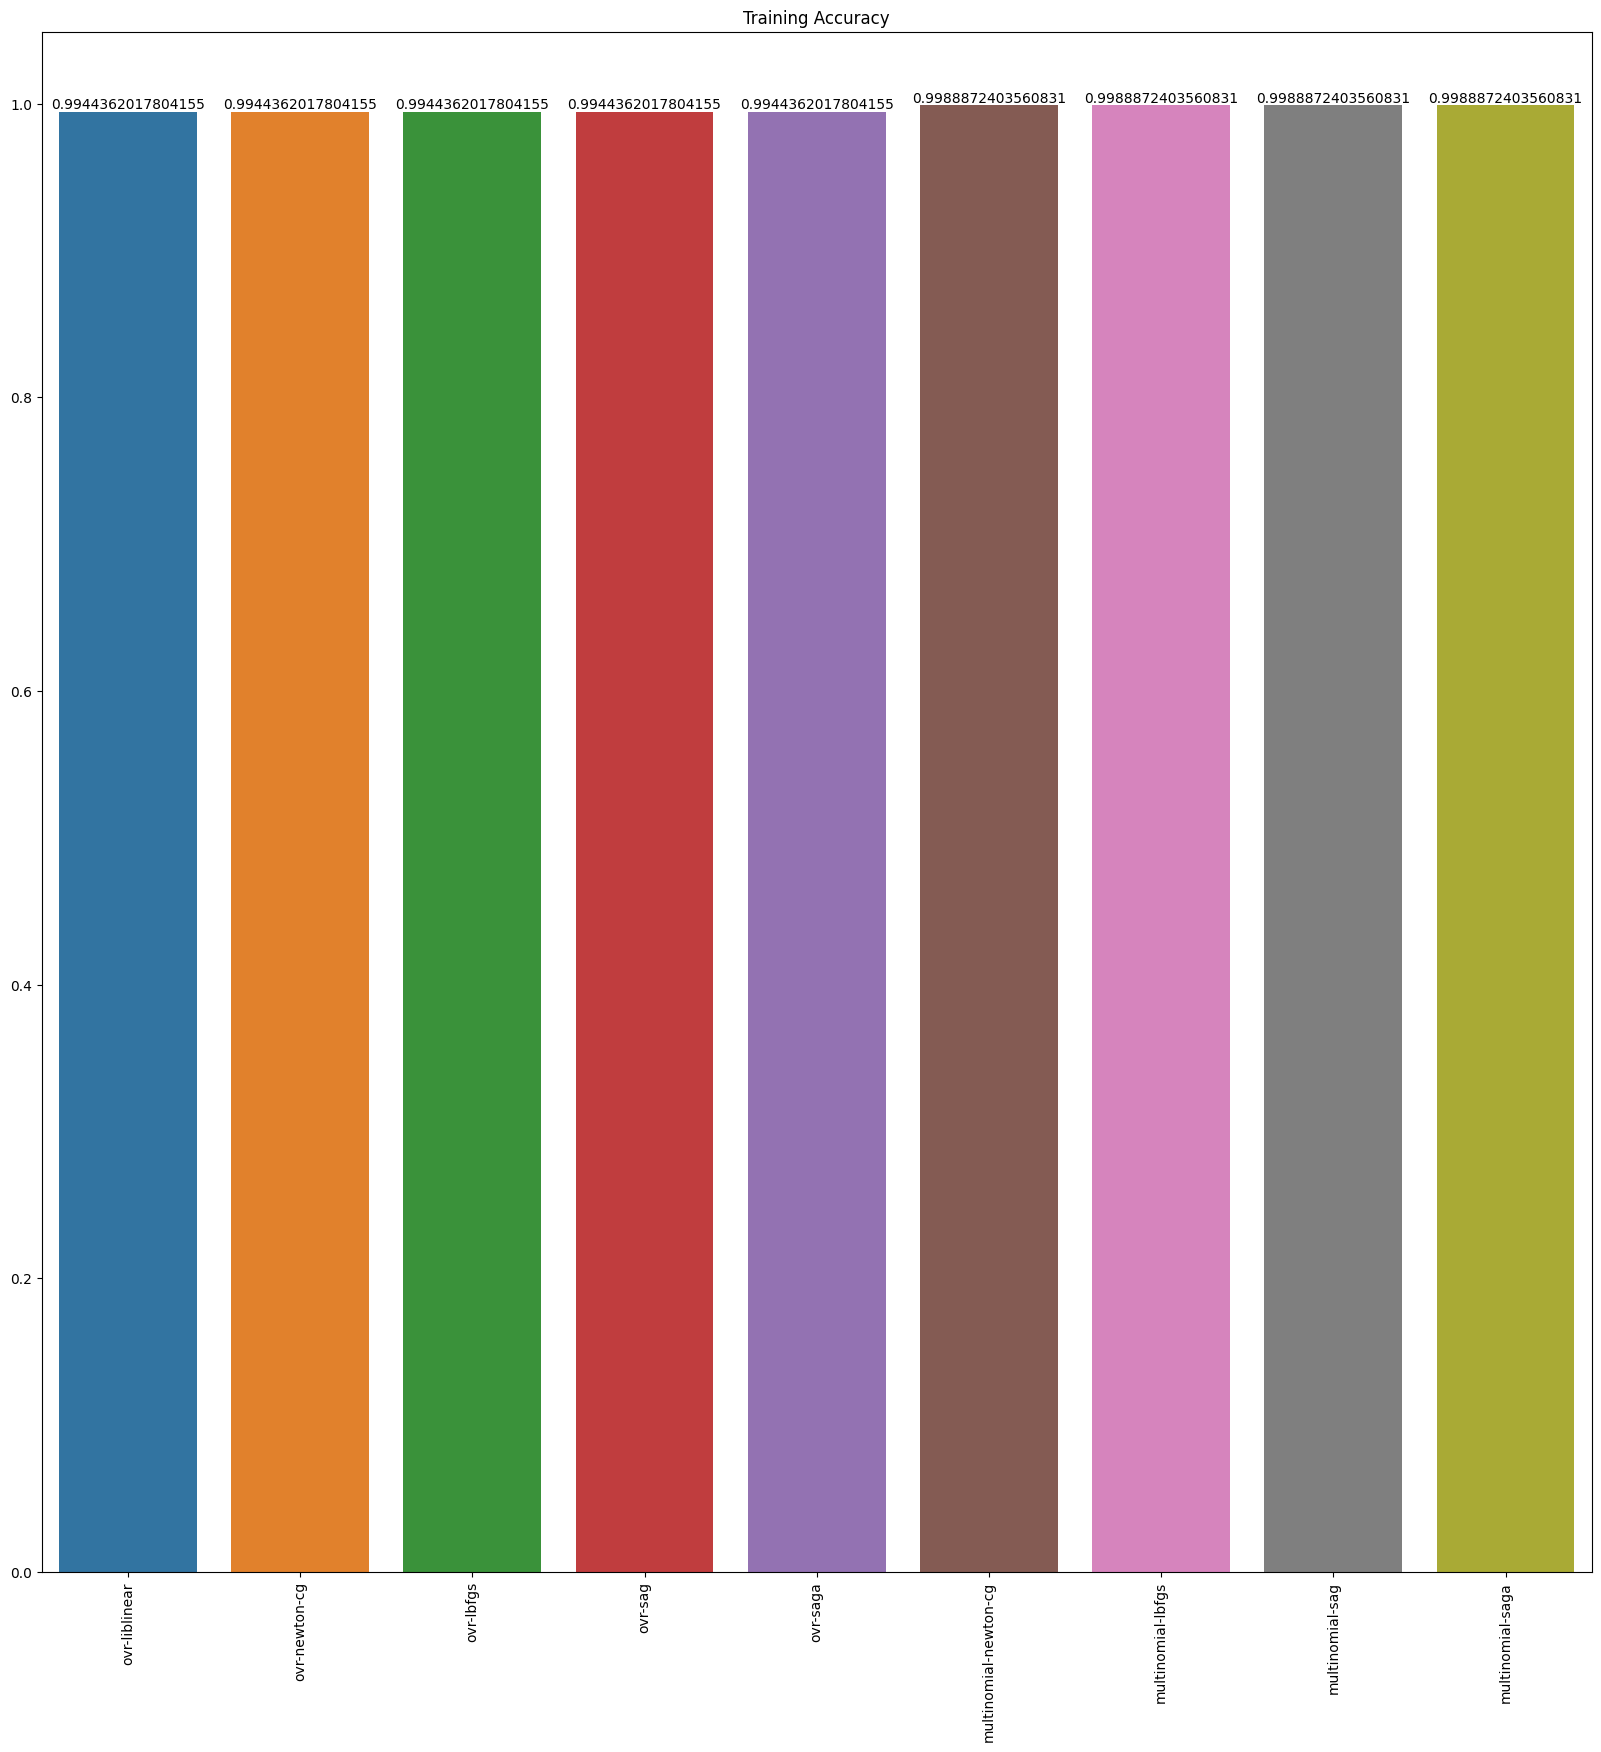

In [ ]:
fig = plt.figure(figsize=(25,25))
sns.barplot(x=params, y=training_accuracy_scores).set_title('Training Accuracy')
plt.xticks(rotation=90)

# Agregar etiquetas a cada barra
for i in range(len(params)):
    plt.text(i, training_accuracy_scores[i], str(training_accuracy_scores[i]), ha='center', va='bottom')

plt.show()

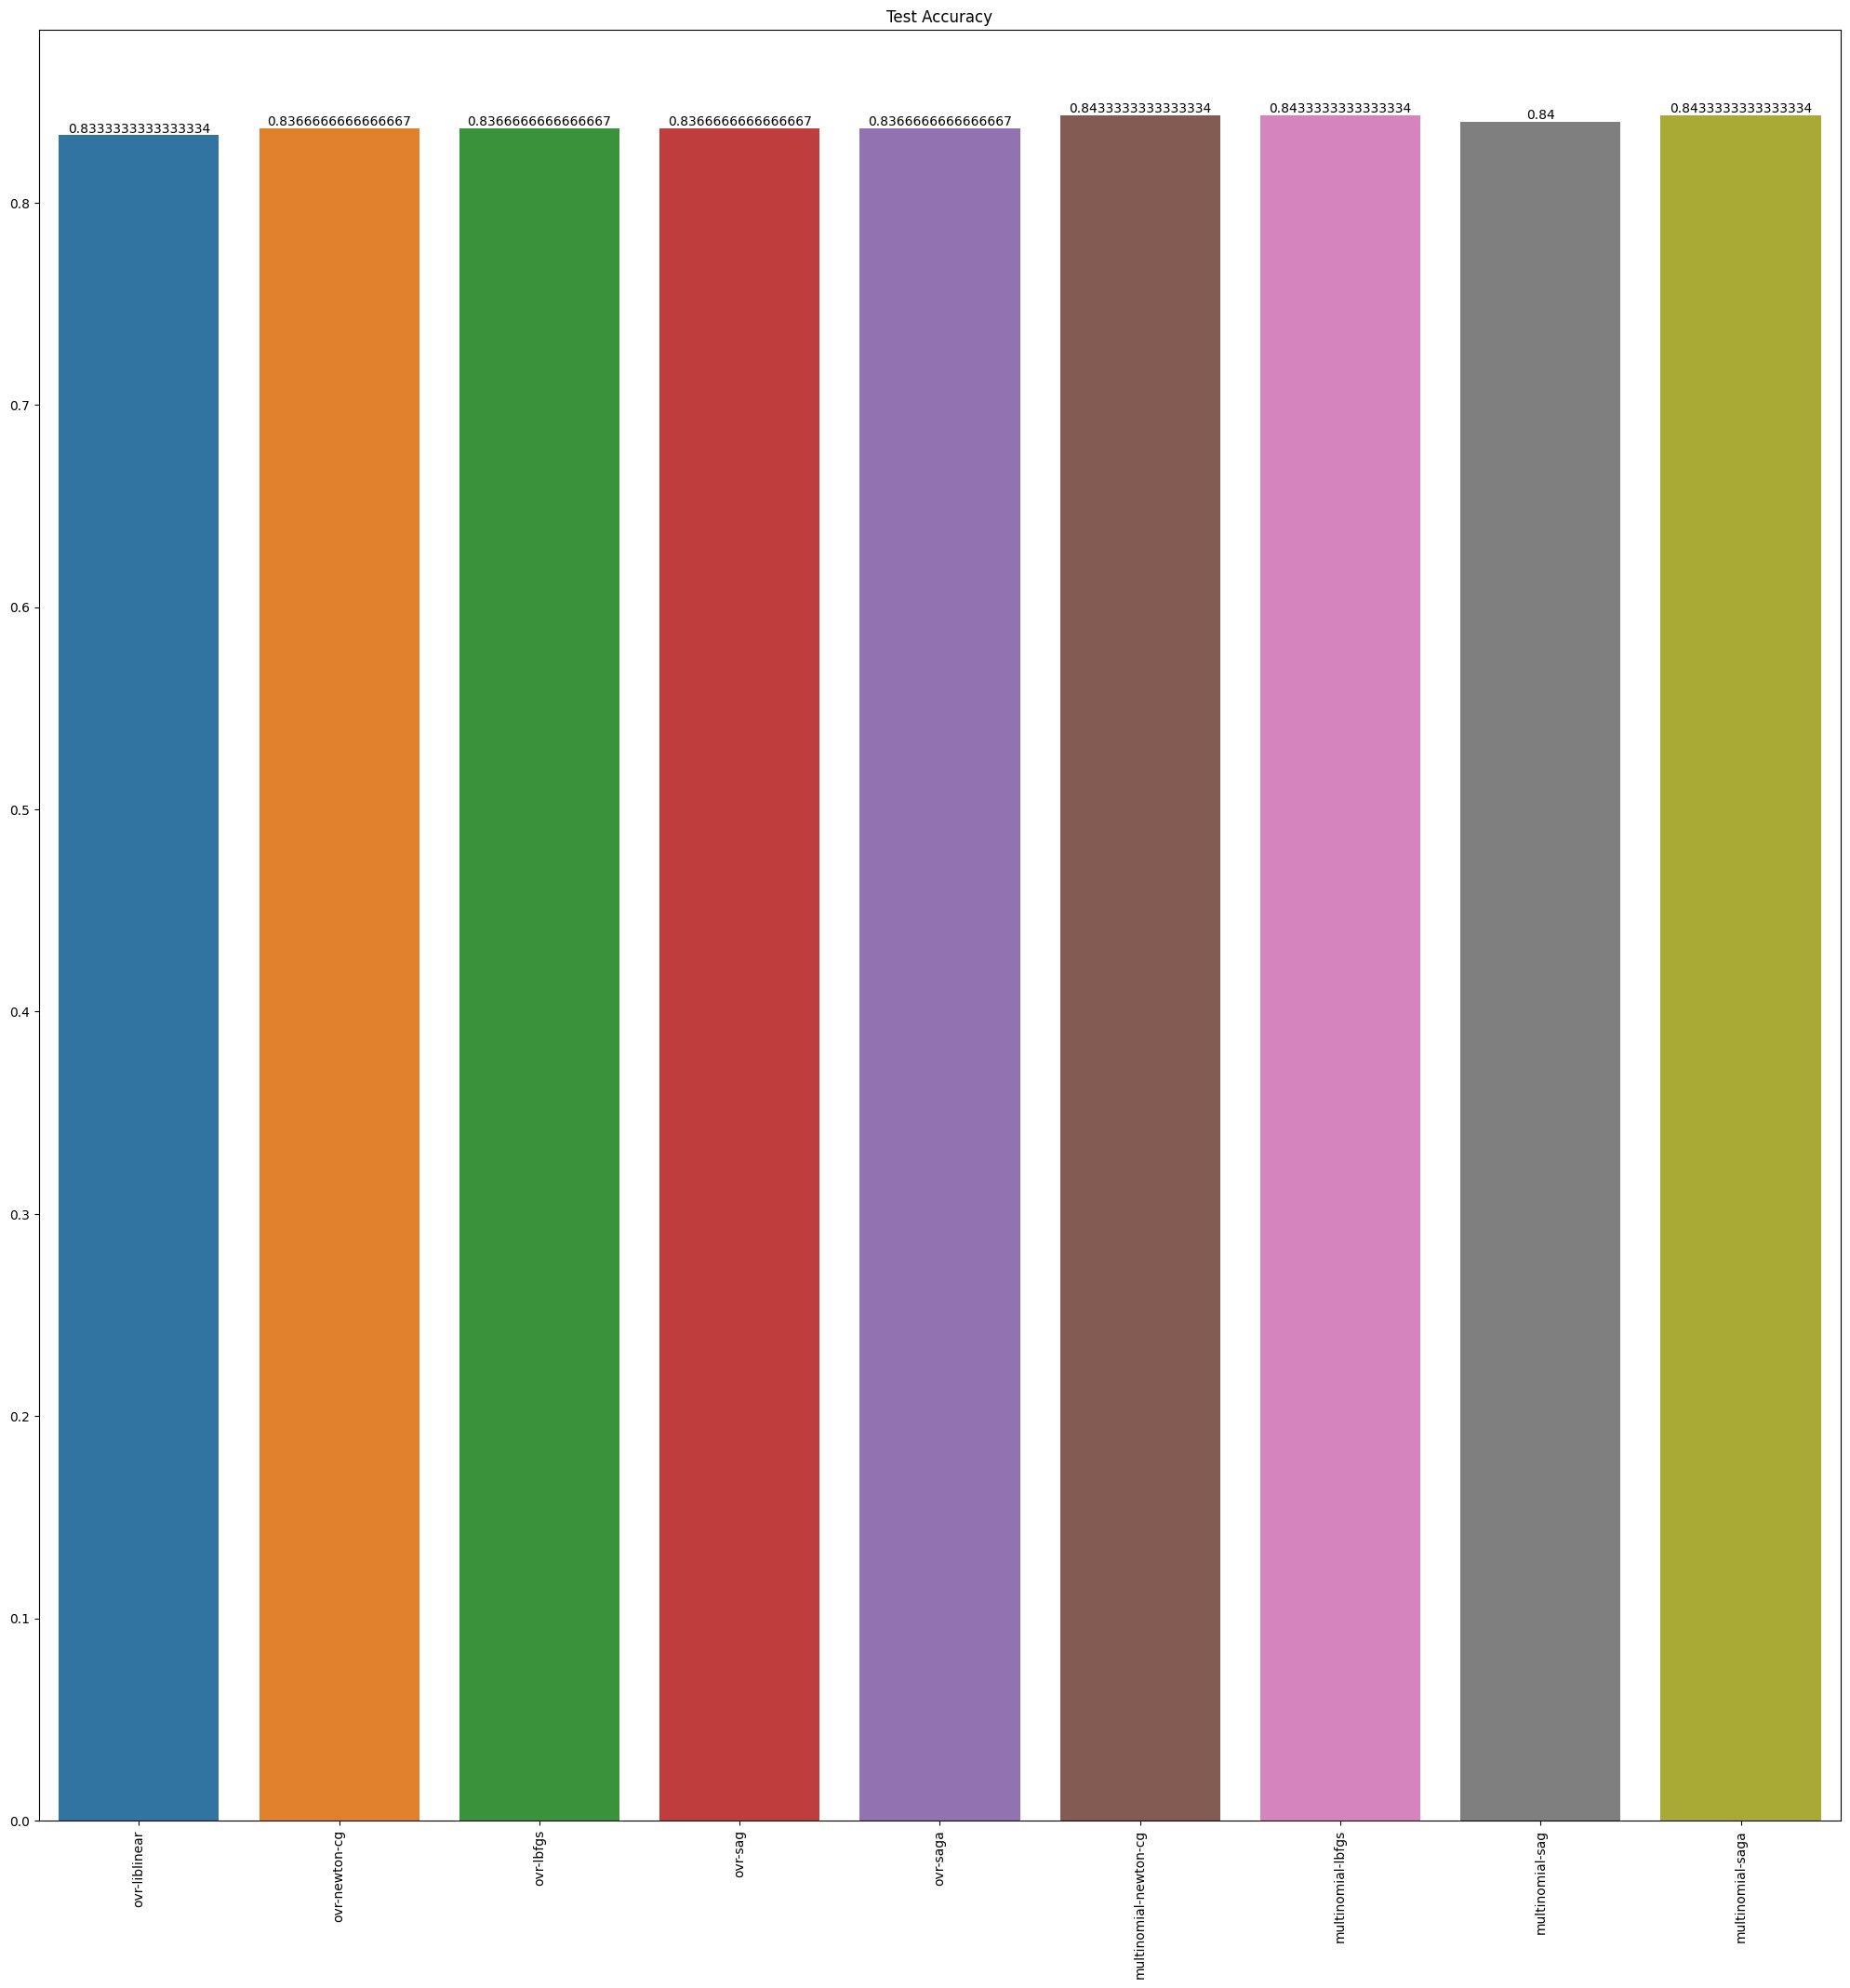

In [ ]:
fig = plt.figure(figsize=(25,25))
sns.barplot(x=params, y=test_accuracy_scores).set_title('Test Accuracy')
plt.xticks(rotation=90)

# Agregar etiquetas a cada barra
for i in range(len(params)):
    plt.text(i, test_accuracy_scores[i], str(test_accuracy_scores[i]), ha='center', va='bottom')

plt.show()

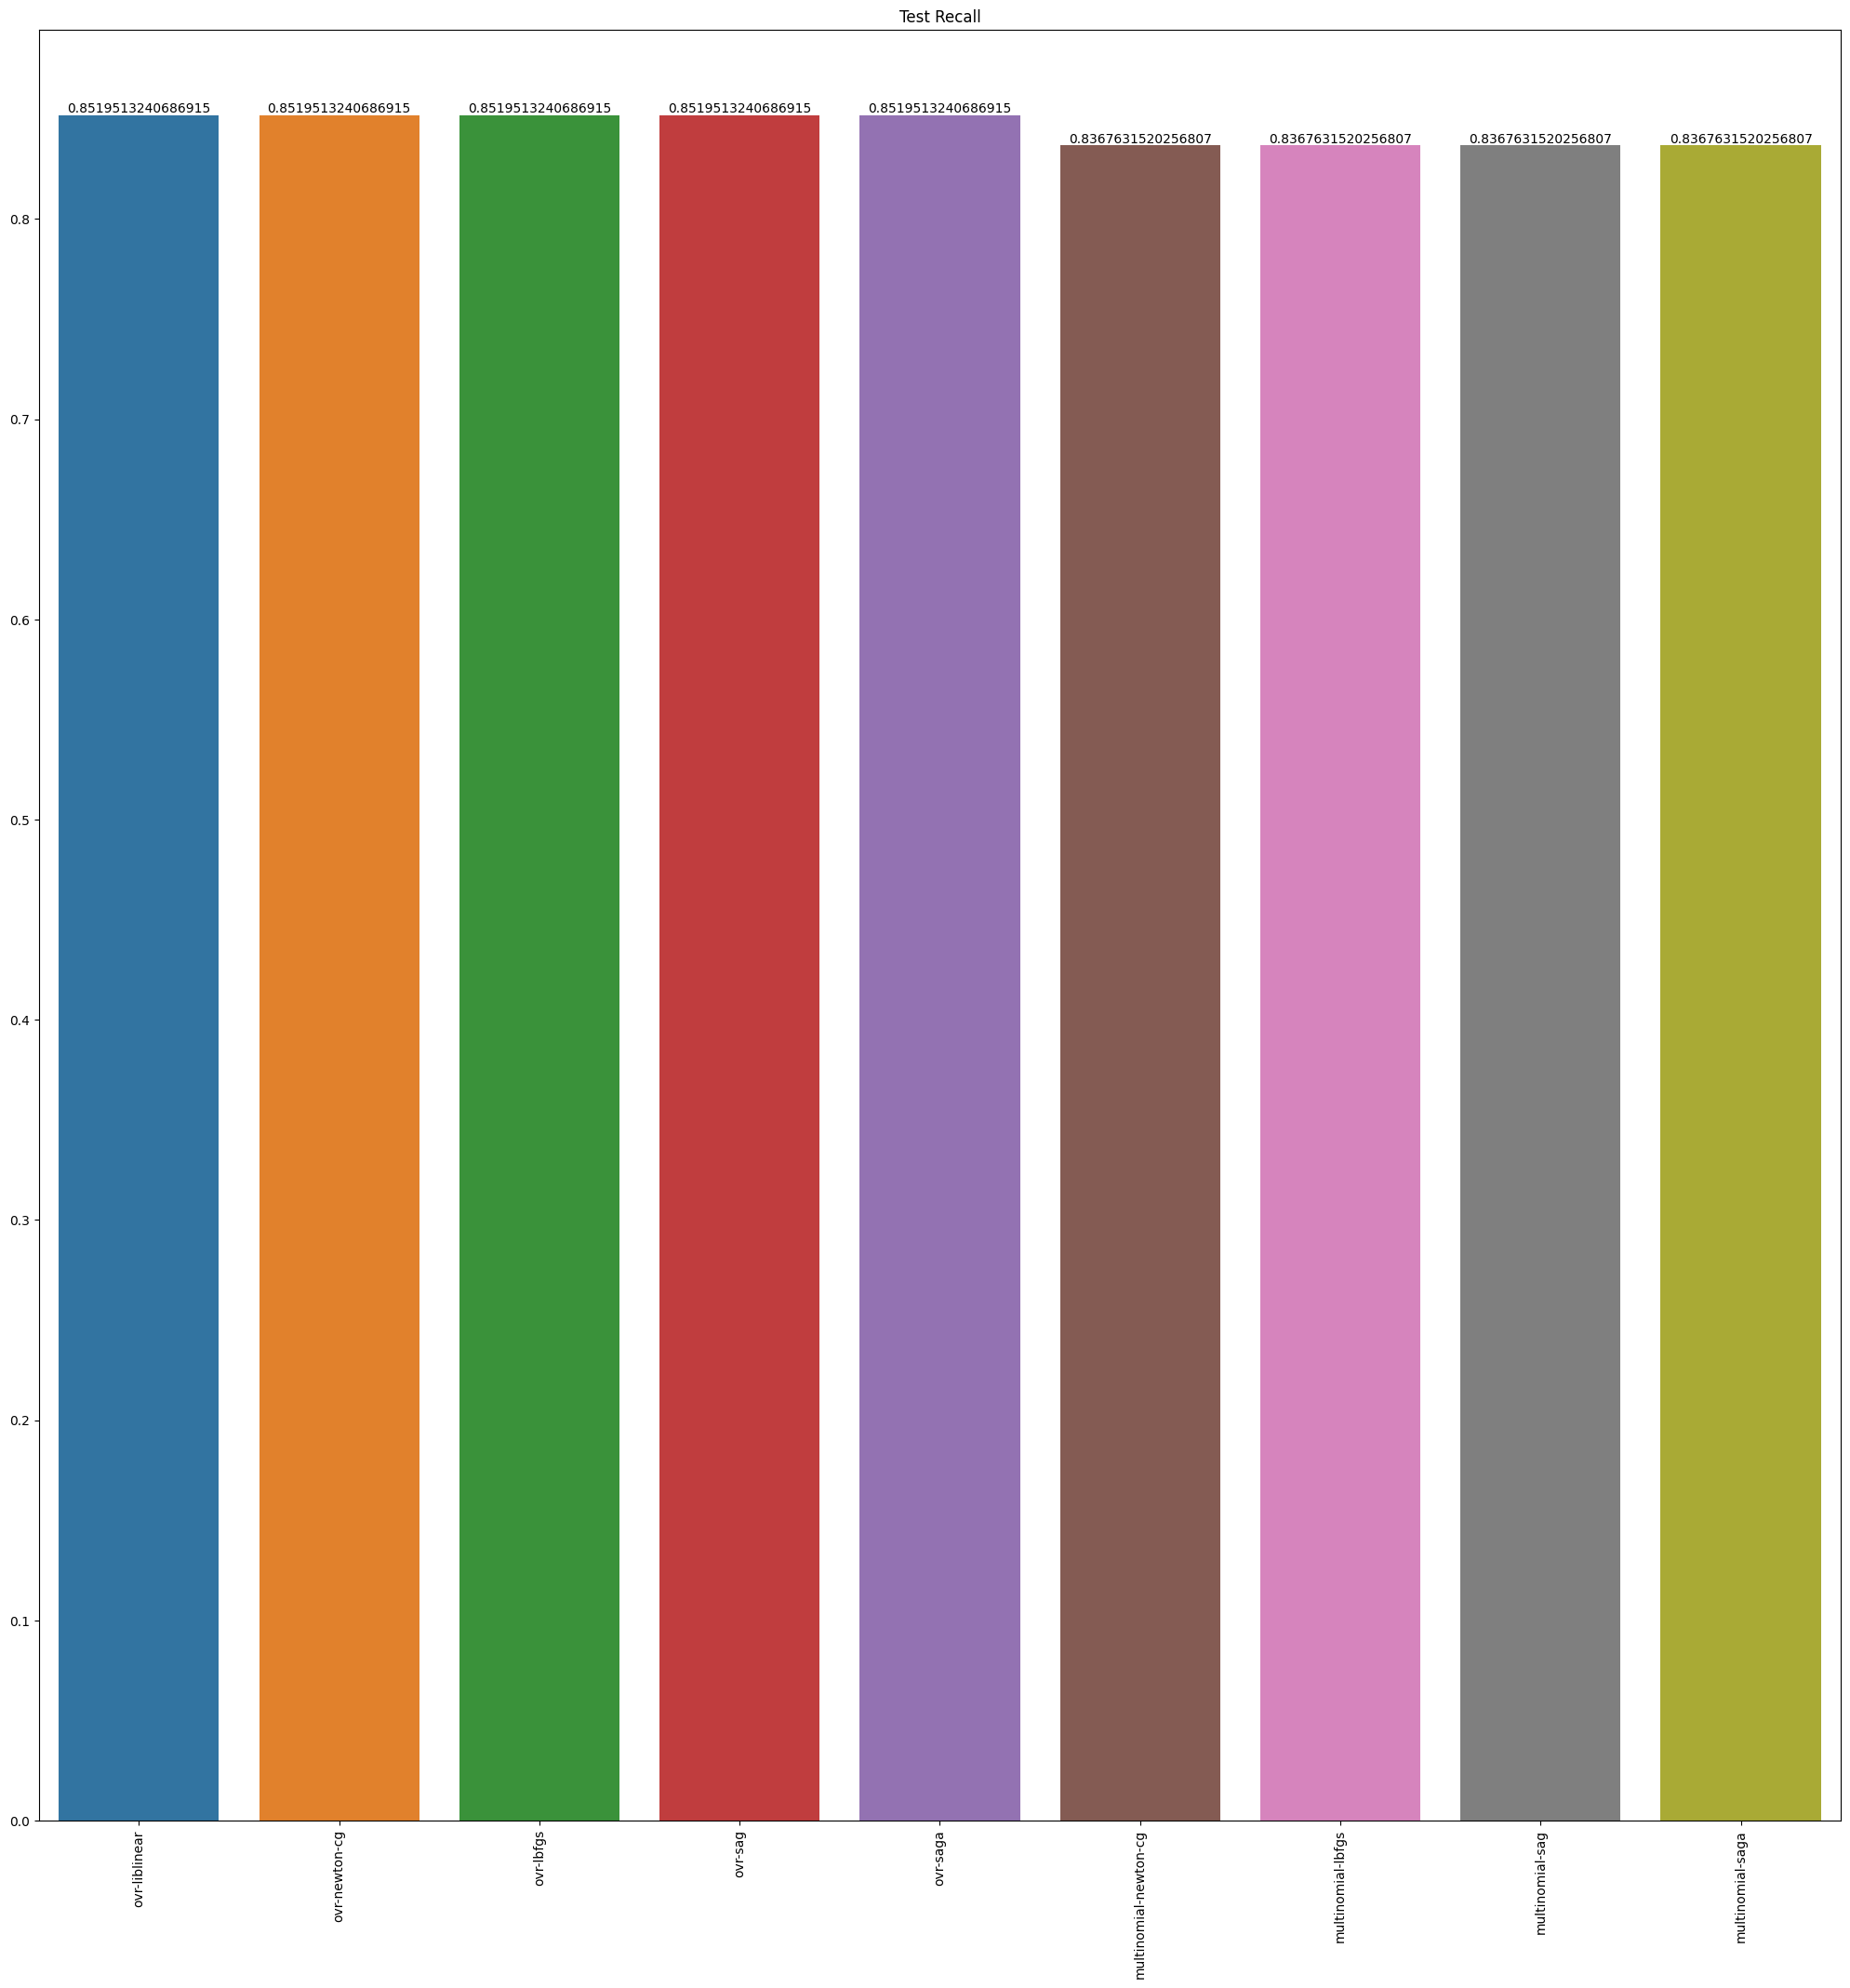

In [ ]:
fig = plt.figure(figsize=(25,25))
sns.barplot(x=params, y=test_recall_macro_scores).set_title('Test Recall')
plt.xticks(rotation=90)

# Agregar etiquetas a cada barra
for i in range(len(params)):
    plt.text(i, test_recall_macro_scores[i], str(test_recall_macro_scores[i]), ha='center', va='bottom')

plt.show()

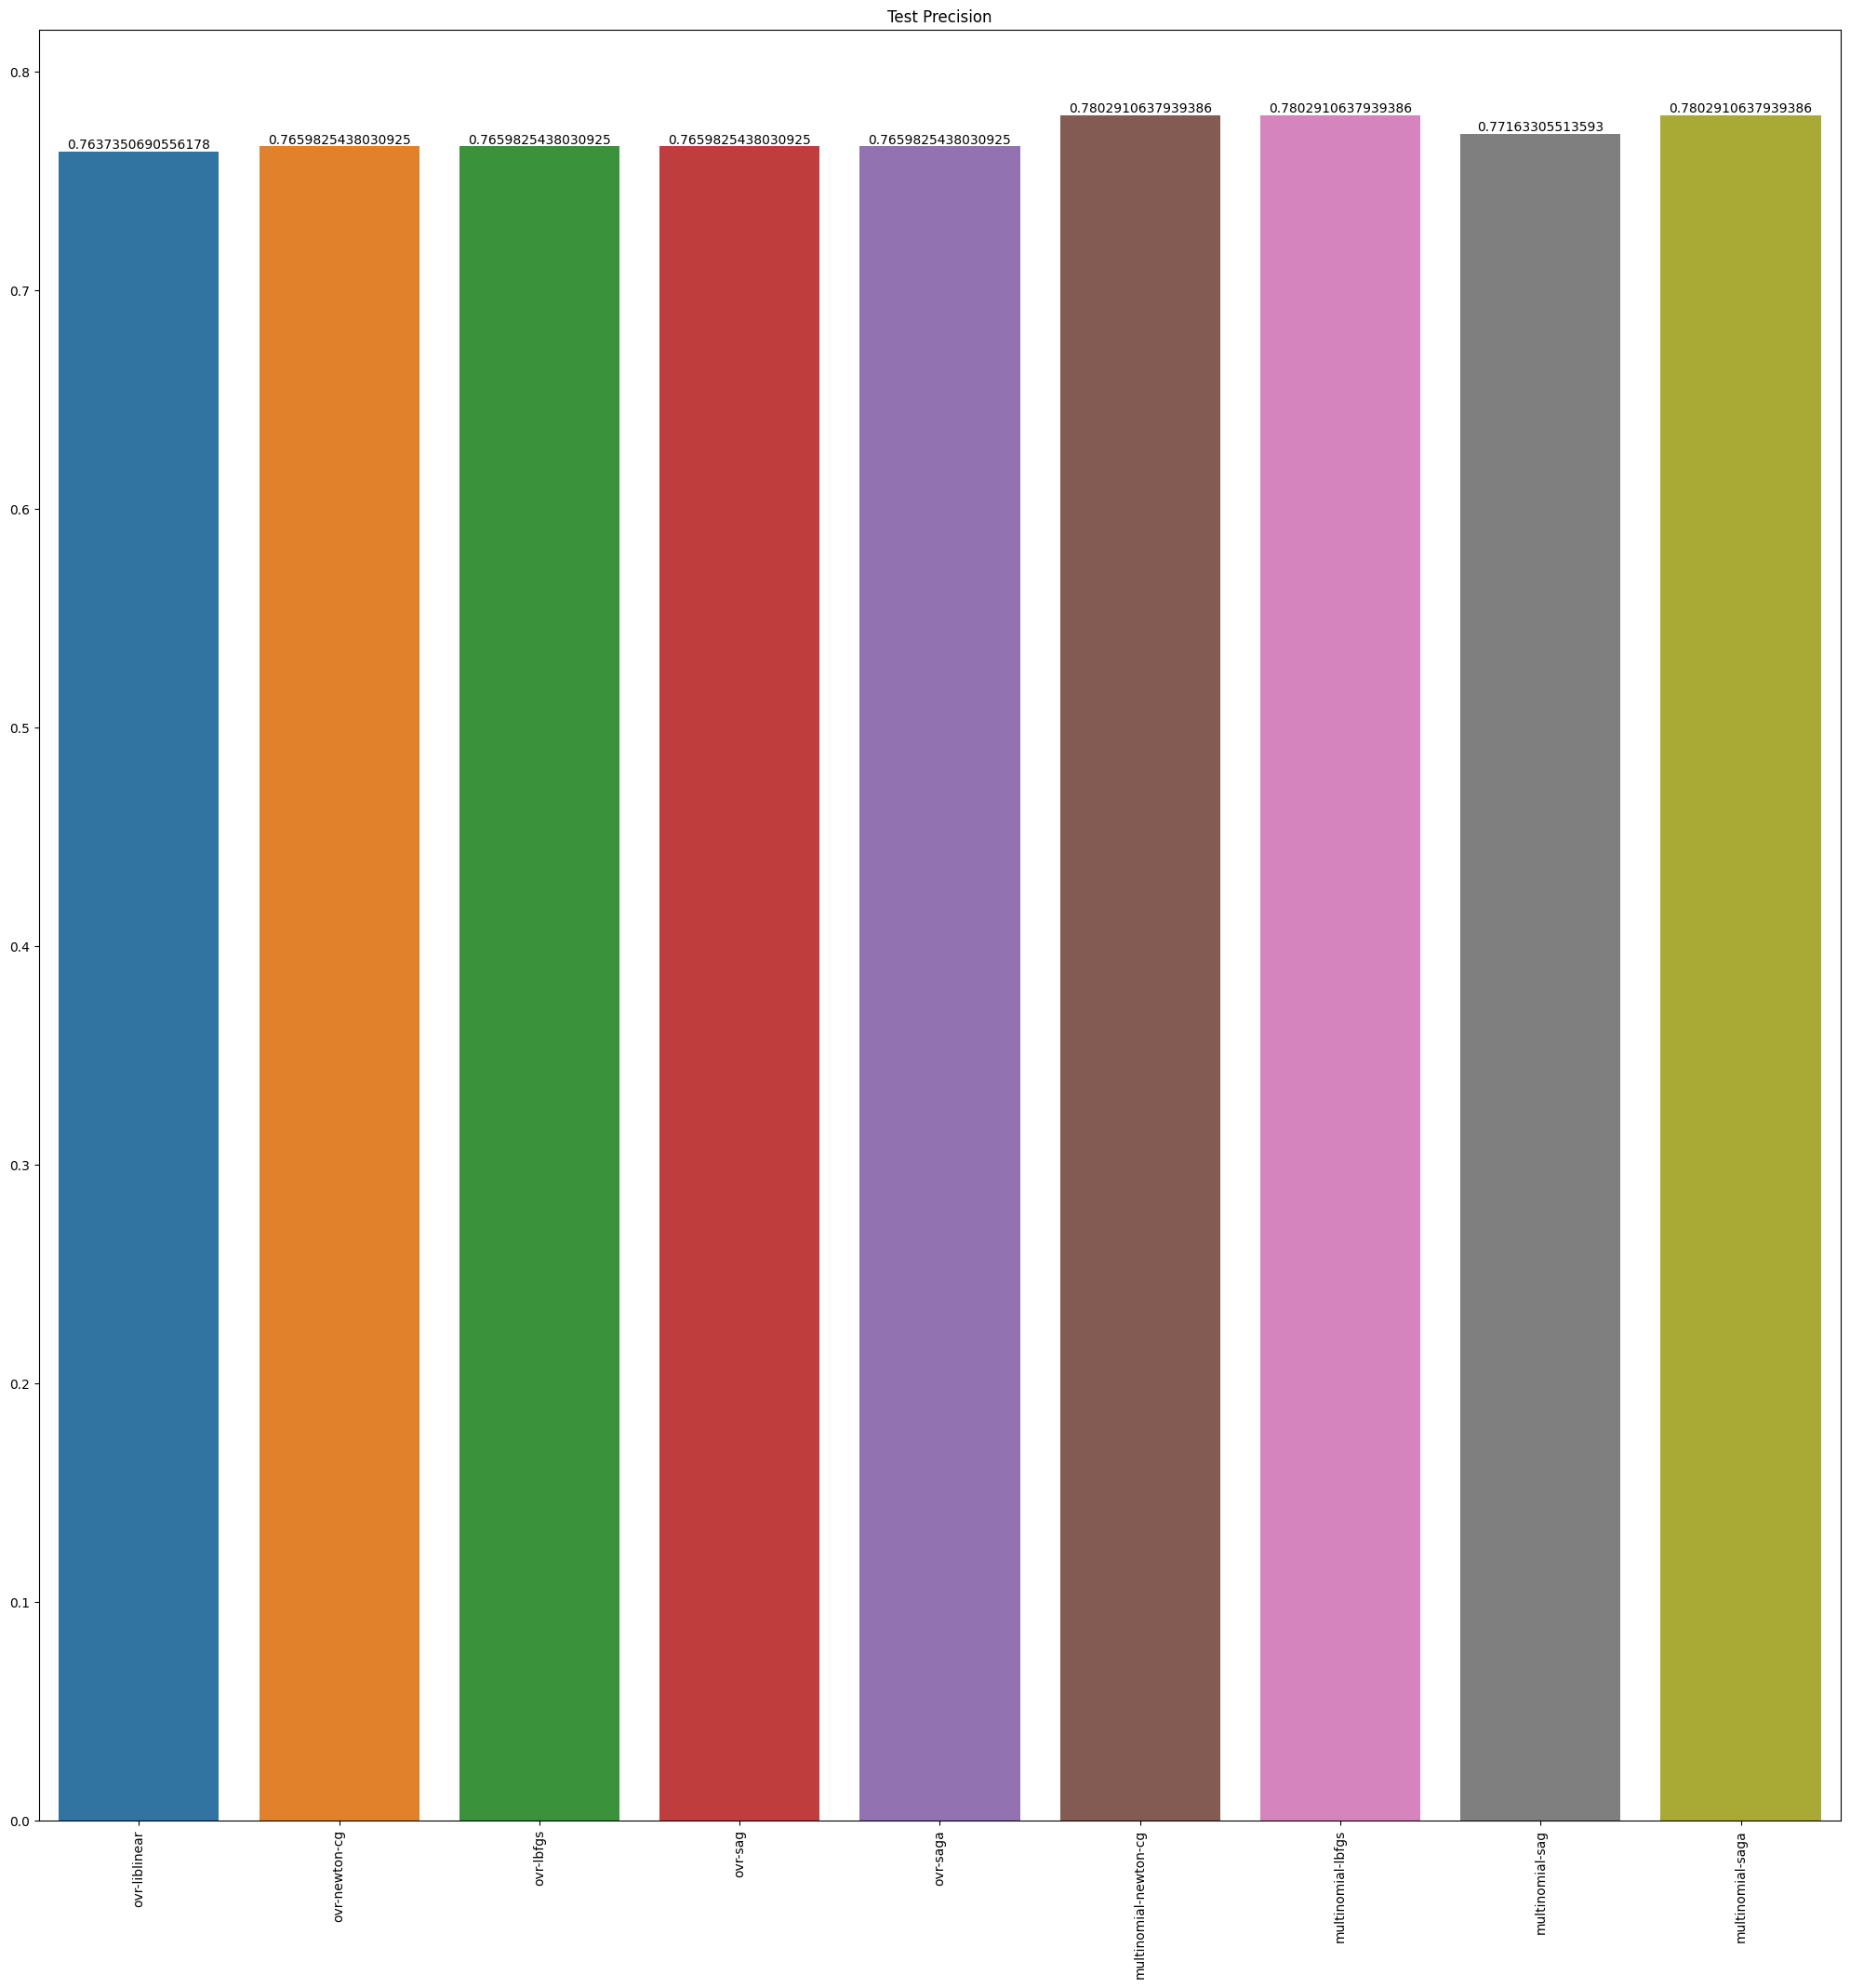

In [ ]:
fig = plt.figure(figsize=(25,25))
sns.barplot(x=params, y=test_precision_macro_scores).set_title('Test Precision')
plt.xticks(rotation=90)

# Agregar etiquetas a cada barra
for i in range(len(params)):
    plt.text(i, test_precision_macro_scores[i], str(test_precision_macro_scores[i]), ha='center', va='bottom')

plt.show()

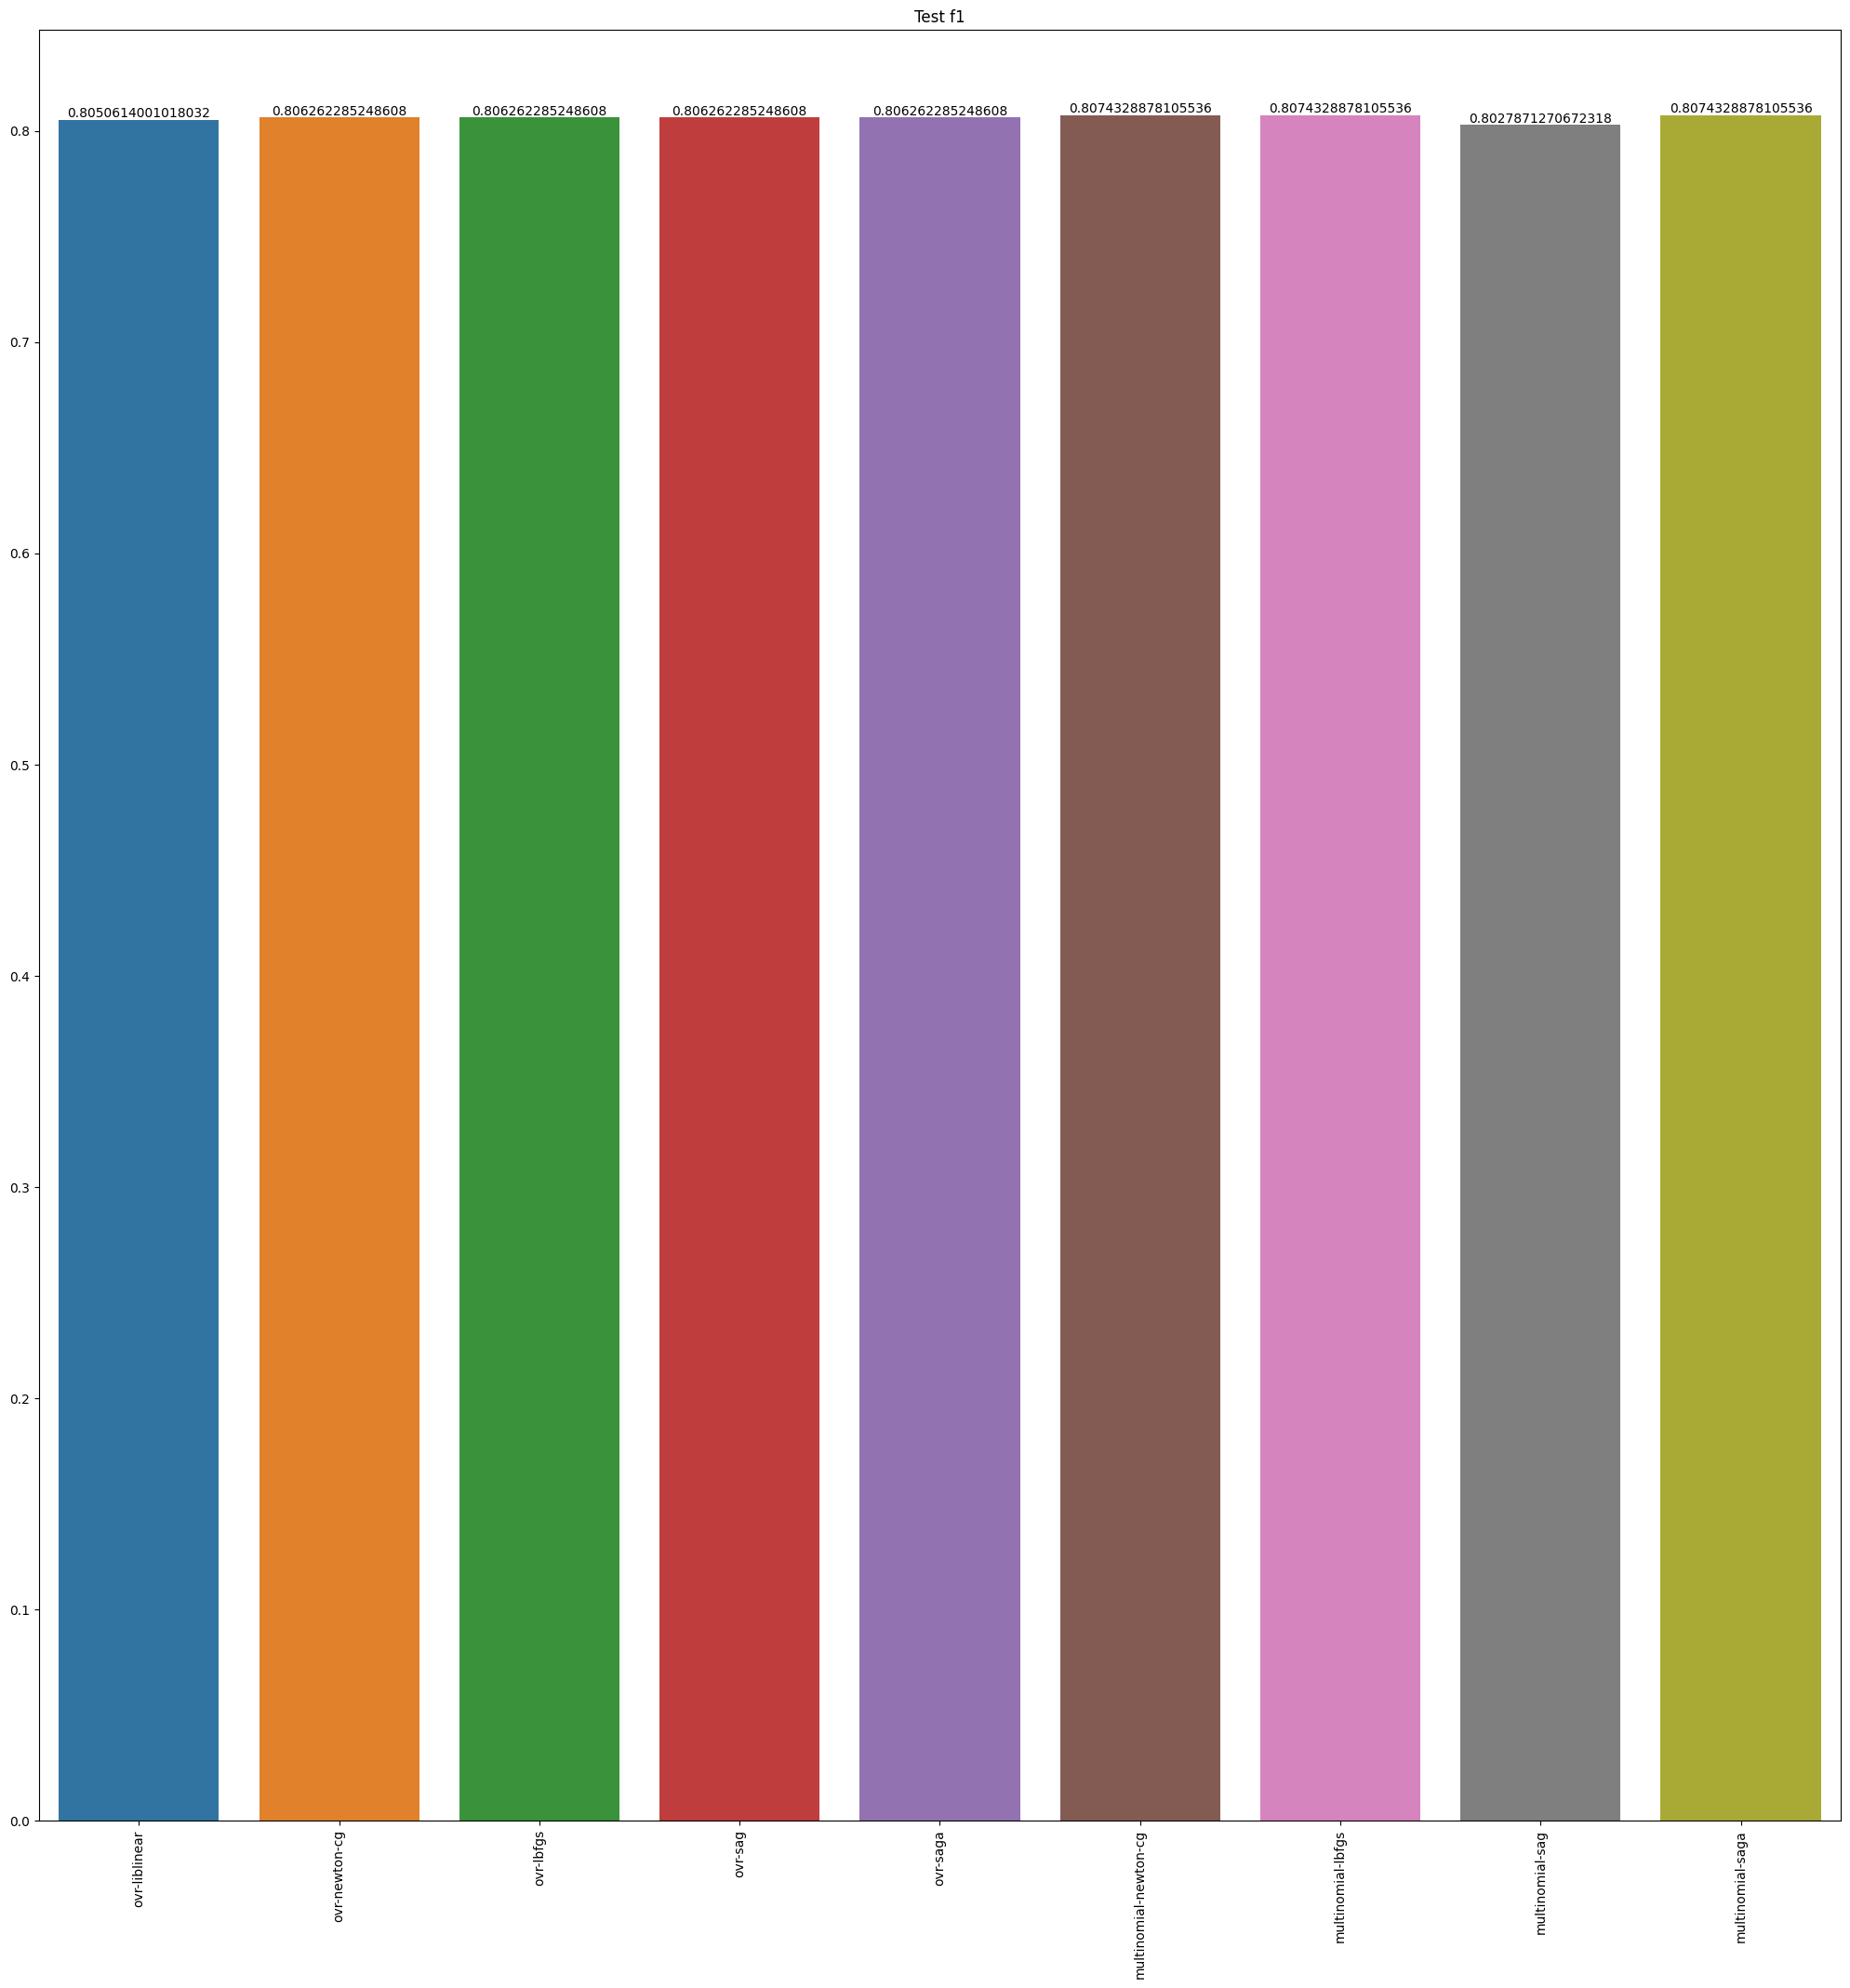

In [ ]:
fig = plt.figure(figsize=(25,25))
sns.barplot(x=params, y=test_f1_macro_scores).set_title('Test f1')
plt.xticks(rotation=90)

# Agregar etiquetas a cada barra
for i in range(len(params)):
    plt.text(i, test_f1_macro_scores[i], str(test_f1_macro_scores[i]), ha='center', va='bottom')

plt.show()

#### Regresion Logistica multinomial definitiva

In [ ]:
lr = LogisticRegression(class_weight="balanced", random_state=42, solver= "saga", multi_class= "multinomial", n_jobs=-1, C=1)

binary_rel_clf = BinaryRelevance(lr)

binary_rel_clf.fit(train_x,target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


BinaryRelevance(classifier=LogisticRegression(C=1, class_weight='balanced',
                                              multi_class='multinomial',
                                              n_jobs=-1, random_state=42,
                                              solver='saga'),
                require_dense=[True, True])

In [ ]:
test_pred = binary_rel_clf.predict(test_x)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision = precision_score(target_test, test_pred)
test_recall = recall_score(target_test, test_pred)
test_f1 = f1_score(target_test, test_pred)
#test_matrix = confusion_matrix(target_test, test_pred)

print(f"Test accuracy: {test_accuracy}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")
print(f"Test f1-score: {test_f1}")
#print(f"Test Matrix: {test_matrix}")

ValueError: ignored

## Datos de validación

In [ ]:
validation_data_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs/validation_data.csv', names=['image', 'text'],header=None)

pd.set_option('display.max_colwidth',None)
validation_data_df.head(5)

,image,text
0,['E_C3M6fXoAY1JxD.jpg'],Accidente en Transversal 93 #traficobogota. Tráfico avanzando21m más lento de lo habitual. https://t.co/A6p7moOa2J https://t.co/sYFuUXBUSc
1,['E_GnWRxWQAYoHWm.jpg'],"#Entérate #México / #PrecauciónVial en #Tlaxcala se registra cierre intermitente de circulación por accidente, aproximadamente en el km 034+500 autopista (117) Ent. (Aut. México-#Puebla)-#Ocotoxco, mismo tramo, dirección #Huamantla. Atienda indicación vial #EnlaceCiudadano https://t.co/ZezNXkRNcU"
2,['E_LoqrgWQAEiSXH.png'],"#Tecomán es el municipio con mayor incidencia del delito de #Secuestro en #Colima, en el municipio se registraron 17 de los 37 casos que reportó el estado. @WallaceIsabel @nachoperaltacol @FiscaliaColima @colimaaldia https://t.co/yqowLIWmJd"
3,['E_REM3LXIAU_Oy-.jpg'],Asesinato del abogado Enrique Pacheco afuera de su casa - https://t.co/Q0vu0kGw1f https://t.co/Q88whxXTlp
4,['E_WEnAEXMAIANwq.jpg'],"#EducacionQR: Existen muchos mitos y realidades alrededor de la violencia sexual infantil. Para saber más sobre cómo prevenirla, atenderla y erradicarla conoce la “Cartilla de Derechos de las Víctimas de Violencia Sexual Infantil”. Descargar: … https://t.co/FAuRpdHs08"


In [ ]:
validation_data_df.drop('image', axis=1, inplace=True)
validation_data_df

,text
0,Accidente en Transversal 93 #traficobogota. Tráfico avanzando21m más lento de lo habitual. https://t.co/A6p7moOa2J https://t.co/sYFuUXBUSc
1,"#Entérate #México / #PrecauciónVial en #Tlaxcala se registra cierre intermitente de circulación por accidente, aproximadamente en el km 034+500 autopista (117) Ent. (Aut. México-#Puebla)-#Ocotoxco, mismo tramo, dirección #Huamantla. Atienda indicación vial #EnlaceCiudadano https://t.co/ZezNXkRNcU"
2,"#Tecomán es el municipio con mayor incidencia del delito de #Secuestro en #Colima, en el municipio se registraron 17 de los 37 casos que reportó el estado. @WallaceIsabel @nachoperaltacol @FiscaliaColima @colimaaldia https://t.co/yqowLIWmJd"
3,Asesinato del abogado Enrique Pacheco afuera de su casa - https://t.co/Q0vu0kGw1f https://t.co/Q88whxXTlp
4,"#EducacionQR: Existen muchos mitos y realidades alrededor de la violencia sexual infantil. Para saber más sobre cómo prevenirla, atenderla y erradicarla conoce la “Cartilla de Derechos de las Víctimas de Violencia Sexual Infantil”. Descargar: … https://t.co/FAuRpdHs08"
...,...
577,Con signos de violencia fue hallado el cuerpo sin vida de una joven en un paraje del municipio de Tecamachalco https://t.co/CTiiRipVwN
578,"#PrecauciónVial en #Querétaro se registra cierre total de circulación por accidente, aproximadamente en el km 023+000 carretera (1720-L1) Libramiento Noreste de Querétaro, mismo tramo, dirección CDMX #RutaAlterna carretera (2190) Querétaro-San Luis Potosí. Atienda indicaciones. https://t.co/4F2IEUQs3O"
579,"Accidente de tránsito en el estado La Guaira , a la altura del polideportivo Vargas , https://t.co/QuwCRDT8Ex"
580,"🔸 En sesión ordinaria del Comité Municipal de Salud y Adicciones de Jesús María, se acordó reforzar y orientar más recursos públicos para invertirlos en una mejor sociedad, con menos consumo de drogas y más programas de prevención del suicidio. 💠 https://t.co/XhRHuW73xK https://t.co/SVXgIBP3uK"


In [ ]:
validation_data_df['text'] = validation_data_df['text'].apply(clean_text)
validation_data_df

,text
0,accidente en transversal 93 traficobogota tráfico avanzando21m más lento de lo habitual
1,entérate méxico precauciónvial en tlaxcala se registra cierre intermitente de circulación por accidente aproximadamente en el km 034500 autopista 117 ent aut méxicopueblaocotoxco mismo tramo dirección huamantla atienda indicación vial enlaceciudadano
2,tecomán es el municipio con mayor incidencia del delito de secuestro en colima en el municipio se registraron 17 de los 37 casos que reportó el estado
3,asesinato del abogado enrique pacheco afuera de su casa
4,educacionqr existen muchos mitos y realidades alrededor de la violencia sexual infantil para saber más sobre cómo prevenirla atenderla y erradicarla conoce la cartilla de derechos de las víctimas de violencia sexual infantil descargar
...,...
577,con signos de violencia fue hallado el cuerpo sin vida de una joven en un paraje del municipio de tecamachalco
578,precauciónvial en querétaro se registra cierre total de circulación por accidente aproximadamente en el km 023000 carretera 1720l1 libramiento noreste de querétaro mismo tramo dirección cdmx rutaalterna carretera 2190 querétarosan luis potosí atienda indicaciones
579,accidente de tránsito en el estado la guaira a la altura del polideportivo vargas
580,en sesión ordinaria del comité municipal de salud y adicciones de jesús maría se acordó reforzar y orientar más recursos públicos para invertirlos en una mejor sociedad con menos consumo de drogas y más programas de prevención del suicidio


In [ ]:
df_Balanced_val = validation_data_df['text'] 
df_Balanced_val

0                                                                                                                                                                                     accidente en transversal 93 traficobogota tráfico avanzando21m más lento de lo habitual    
1                   entérate méxico  precauciónvial en tlaxcala se registra cierre intermitente de circulación por accidente aproximadamente en el km 034500 autopista 117 ent aut méxicopueblaocotoxco mismo tramo dirección huamantla atienda indicación vial enlaceciudadano  
2                                                                                                                    tecomán es el municipio con mayor incidencia del delito de secuestro en colima en el municipio se registraron 17 de los 37 casos que reportó el estado      
3                                                                                                                                                                                 

In [ ]:
val_x = vectorizador_real.transform(df_Balanced_val)
val_x

<582x10924 sparse matrix of type '<class 'numpy.int64'>'
	with 7885 stored elements in Compressed Sparse Row format>

In [ ]:
val_pred = binary_rel_clf.predict(val_x) 

In [ ]:
from google.colab import files

val_pred_df = pd.DataFrame(val_pred)
val_pred_df.to_csv('submission1-TXT.csv', index=False, header=None)
!zip -r '/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/Solve/txt/task1/result1/submission1-TXT.zip' 'submission1-TXT.csv'


updating: submission1-TXT.csv (deflated 87%)


In [ ]:
files.download('/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/Solve/txt/task1/result1/submission1-TXT.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# BERT (Bidirectional Encoder Representations from Transformers) -> BETO

## Emojis a palabras con un diccionario
##  -> Análisis de sentimientos: Aumento columnas con emociones. Eventos violentos contienen más emociones negativoas, ¿Qué emociones contienen los eventos no violentos?
##  -> Distribución de etiquetas de cada clase para la task2 (multiclase)

In [ ]:
# from nltk.stem import SnowballStemmer
# from sklearn.naive_bayer import MultimonialNB 
  # Alpha = MultimonialNB(alpha=2)